In [2]:
import pandas as pd
import numpy as np

import os
import re

In [5]:
df = pd.read_csv('./merged_airbnb_host.csv')

In [6]:
df['price_per_night'] = df['price_per_night'].replace('[\$,]', '', regex=True).astype(float)

<Axes: >

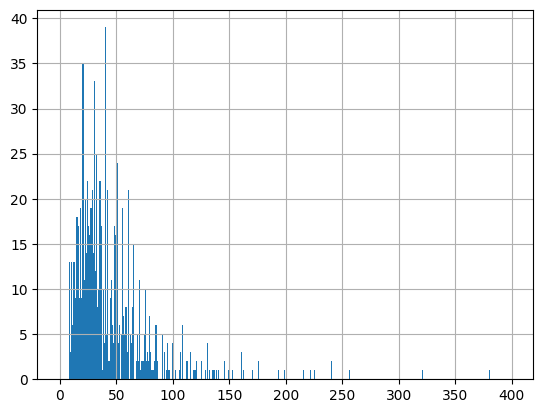

In [9]:
df['price_per_night'].hist(bins=[ i for i in range(0,400)])

In [10]:
df = df.reset_index()

In [11]:
df['host_response_rate'] = df['host_response_rate'].str.split(":",expand=True)[1]
df['host_response_rate'] = df['host_response_rate'].str.replace("%","")

In [12]:
df['host_response_rate']

0         50
1         50
2        100
3       None
4        100
        ... 
1423     NaN
1424     NaN
1425     NaN
1426     100
1427     NaN
Name: host_response_rate, Length: 1428, dtype: object

<Axes: ylabel='host_response_rate'>

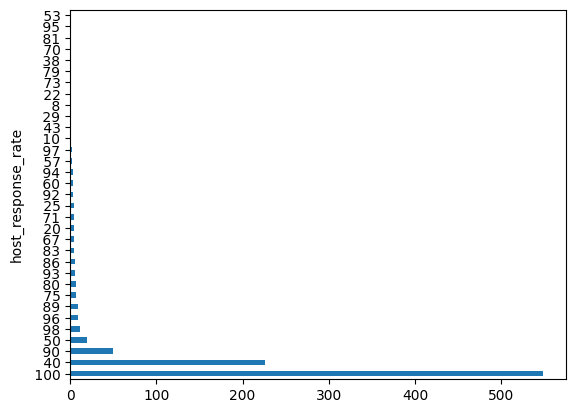

In [15]:
df['host_response_rate'].value_counts().plot(kind='barh')

In [16]:
# Function to extract latitude and longitude from URL
def extract_lat_lng(url):
    if isinstance(url, str):  # Check if url is a string (not NaN)
        params = url.split('?')[1].split('&')
        latitude = None
        longitude = None
        for param in params:
            key_value = param.split('=')
            if key_value[0] == 'll':
                lat_lng = key_value[1].split(',')
                latitude = float(lat_lng[0])
                longitude = float(lat_lng[1])
                break
        return latitude, longitude
    else:
        return None, None  # Return None for NaN values

# Apply the function to the 'url' column and create new columns for latitude and longitude
df[['latitude', 'longitude']] = df['google_map_location_link'].apply(lambda x: pd.Series(extract_lat_lng(x)))


In [17]:
df[['latitude', 'longitude']]

,latitude,longitude
0,NaN,NaN
1,22.362980,91.827960
2,22.366900,91.829100
3,22.378060,91.854980
4,22.356300,91.810700
...,...,...
1423,22.695040,90.361800
1424,22.778333,89.724451
1425,22.590000,89.848400
1426,22.702143,90.371497
